# Offline on the Feed Forward Neural Network

### Introduction

Each layers implementation can be found in the `layers.py` file. The `network.py` file contains the implementation of the network. The forward pass and backward pass is implemented here. The same file contains the training code also predict function which is used to predict the output of the network.

In [1]:


import torchvision.datasets as ds
import torchvision.transforms as transforms
import numpy as np

train_validation_set = ds.EMNIST(root='./data', 
                                split='letters',
                                train=True,
                                transform=transforms.ToTensor(),
                                download=True)

train_validation_data =[]
train_validation_labels = []

for data, label in train_validation_set:
    data_flatten = data.view(-1)
    train_validation_data.append(data_flatten.numpy())
    train_validation_labels.append(label)
    
train_validation_data = np.array(train_validation_data)
train_validation_labels = np.array(train_validation_labels)

In [2]:


# print the number of samples in the training set
print("Number of samples in the training set: ", len(train_validation_data))

# print the shape of each sample
print("Shape of each sample: ", train_validation_data.shape)

# print the shape of the labels
print("Shape of labels: ", train_validation_labels.shape)

# reshape the labels to be a column vector
train_validation_labels = train_validation_labels.reshape(-1, 1)

# print the shape of the labels
print("Shape of labels: ", train_validation_labels.shape)

# print the number of different labels in the training set
print("Number of different labels: ", len(np.unique(train_validation_labels)))

Number of samples in the training set:  124800
Shape of each sample:  (124800, 784)
Shape of labels:  (124800,)
Shape of labels:  (124800, 1)
Number of different labels:  26


### Plot the first 5 images in the training dataset

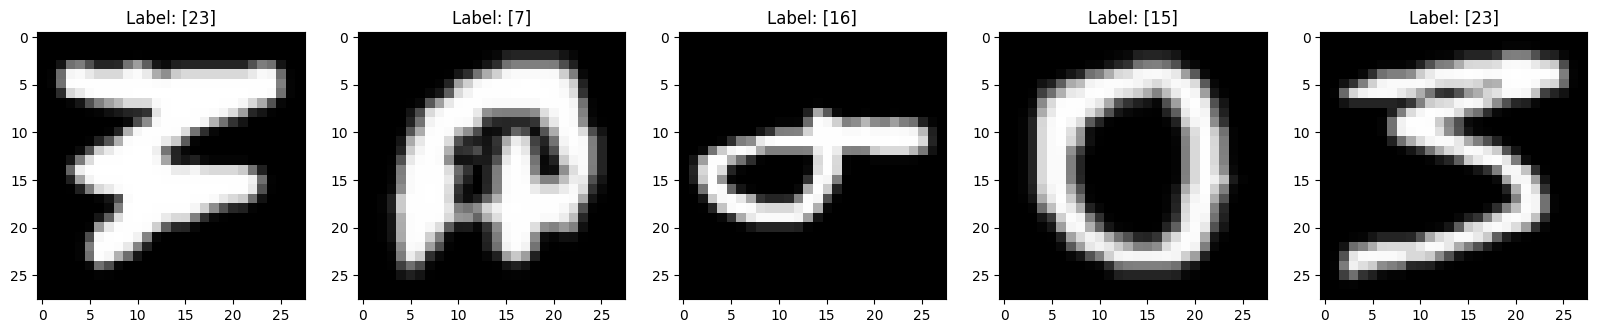

In [3]:


import matplotlib.pyplot as plt

# plot the first 5 samples in the training set
fig = plt.figure(figsize=(20, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(train_validation_data[i].reshape(28, 28), cmap='gray')
    ax.set_title("Label: {}".format(train_validation_labels[i]))
plt.show()


### One hot encoding of labels
 
We want to convert the labels into one hot encoding. The one hot encoding is a vector of length equal to the number of classes. 
The vector is all zeros except for the class which is represented by a one. For example, 
- if the class is 3 and the total number of classes is 5 then the one hot encoding will be `[0, 0, 0, 1, 0]`. The one hot encoding of the labels is stored in the variable `y_oh`.

In [4]:


from sklearn.preprocessing import OneHotEncoder


# create the one hot encoder
one_hot_encoder = OneHotEncoder(categories='auto')

# fit the encoder to the labels
one_hot_encoder.fit(train_validation_labels)

# transform the labels using the one hot encoder
train_validation_labels = one_hot_encoder.transform(train_validation_labels).toarray()

# print the shape of the labels
print("Shape of labels: ", train_validation_labels.shape)



Shape of labels:  (124800, 26)



### Create the network with the following architecture

- Input layer with 784 neurons
- Hidden layer with 256 neurons
- Output layer with 26 neurons
- Activation function for hidden layer: ReLU
- Number of hidden layers: 2
- Number of epochs: 10

In [5]:


from network import Network
from loss import categorical_cross_entropy, categorical_cross_entropy_prime
from activation import SigmoidActivation
from dense_layer import DenseLayer
from dropout_layer import DropoutLayer

layers = [
    DenseLayer(784, 256),
    SigmoidActivation(),
    DropoutLayer(0.2),
    DenseLayer(256, 128),
    SigmoidActivation(),
    DropoutLayer(0.2),
    DenseLayer(128, 26),
]

# create a network object
# net = Network(number_of_inputs=784,
#               number_of_outputs=26,
#               number_of_layers=3,
#               number_of_nodes_in_dense_layer=256,
#               epochs=100,
#               verbose=True,
#               learning_rate=0.0005,
#               decay_rate=0.99995,
#               activation_class=SigmoidActivation,
#               loss_function=categorical_cross_entropy,
#               loss_function_prime=categorical_cross_entropy_prime,)
net = Network(layers=layers,
                epochs=150,
                verbose=True,
                learning_rate=0.0005,
                decay_rate=0.99995,
                loss_function=categorical_cross_entropy,
                loss_function_prime=categorical_cross_entropy_prime,)

Network created with the following layers:
Layer DenseLayer: input size 784 and output size 256
Layer SigmoidActivation
Layer DropoutLayer
Layer DenseLayer: input size 256 and output size 128
Layer SigmoidActivation
Layer DropoutLayer
Layer DenseLayer: input size 128 and output size 26


### Train and test split of the dataset

The dataset is split into training and testing dataset. The training dataset is used to train the network and the testing dataset is used to test the network. The training dataset is 80% of the total dataset and the testing dataset is 20% of the total dataset. The training dataset is stored in the variables `X_train` and `y_train`. The testing dataset is stored in the variables `X_test` and `y_test`.

In [6]:
from sklearn.model_selection import train_test_split

# split the training set into training and validation sets
train_data, validation_data, train_labels, validation_labels = train_test_split(train_validation_data, 
                                                                                train_validation_labels, 
                                                                                test_size=0.15, 
                                                                                random_state=42)

# check the shape of the training data
print("Shape of training data: ", train_data.shape)
print("Shape of training labels: ", train_labels.shape)

# check the shape of the validation data
print("Shape of validation data: ", validation_data.shape)
print("Shape of validation labels: ", validation_labels.shape)

Shape of training data:  (106080, 784)
Shape of training labels:  (106080, 26)
Shape of validation data:  (18720, 784)
Shape of validation labels:  (18720, 26)


### Train the network

We can train the network by calling the `train` function. The `train` function takes the following parameters:

- `X`: Training data
- `Y`: Training labels

In [7]:
# train the network
net.train(train_data, train_labels)

Training the network...


Epoch: 1
	Loss: 0.00193041
	Accuracy: 0.18072210
	F1 Score: 0.16359732
	Current learning rate:  0.000499975
Epoch: 2
	Loss: 0.00183755
	Accuracy: 0.30641026
	F1 Score: 0.27060861
	Current learning rate:  0.0004999500012500001
Epoch: 3
	Loss: 0.00179595
	Accuracy: 0.35777715
	F1 Score: 0.30956204
	Current learning rate:  0.0004999250037499376
Epoch: 4
	Loss: 0.00177196
	Accuracy: 0.38159879
	F1 Score: 0.32507318
	Current learning rate:  0.00049990000749975
Epoch: 5
	Loss: 0.00175785
	Accuracy: 0.39738876
	F1 Score: 0.33626378
	Current learning rate:  0.000499875012499375
Epoch: 6
	Loss: 0.00174802
	Accuracy: 0.40920060
	F1 Score: 0.34504189
	Current learning rate:  0.0004998500187487501
Epoch: 7
	Loss: 0.00174108
	Accuracy: 0.42022059
	F1 Score: 0.35456617
	Current learning rate:  0.0004998250262478127
Epoch: 8
	Loss: 0.00173486
	Accuracy: 0.43128771
	F1 Score: 0.36497697
	Current learning rate:  0.0004998000349965003
Epoch: 9
	Loss: 0.00173092
	Accuracy: 0.44024321
	F1 Score: 0.3747408

### Plot the loss curve

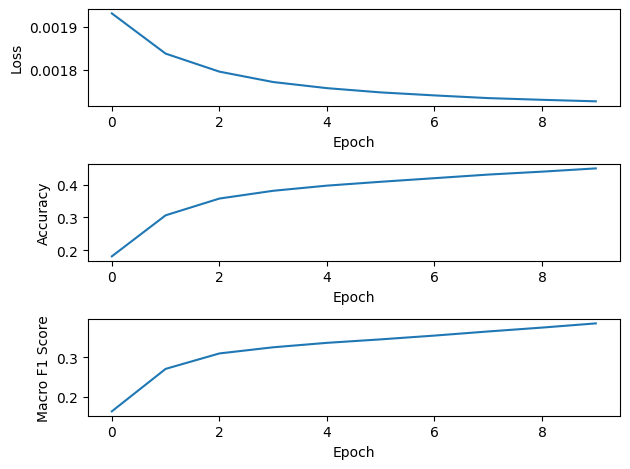

In [8]:
fig, axs = plt.subplots(3)

# plot the loss curve
axs[0].plot(range(net.epochs), net.losses)
axs[0].set(xlabel="Epoch", ylabel="Loss")

# plot the accuracy curve
axs[1].plot(range(net.epochs), net.accuracy)
axs[1].set(xlabel="Epoch", ylabel="Accuracy")

# plot the macro f1 score curve
axs[2].plot(range(net.epochs), net.f1_score)
axs[2].set(xlabel="Epoch", ylabel="Macro F1 Score")

plt.tight_layout()
plt.show()


### Predict the output of the network

We can predict the output of the network by calling the `predict` function.


We will also calculate the validation loss, validation accuracy and validation macro-f1 score.

In [9]:
# evaluate the network on the validation set

model_prediction = net.predict(validation_data)

validation_loss = np.mean(net.loss_function(validation_labels, model_prediction)) / len(validation_labels)

# calculate the accuracy of the model

from sklearn.metrics import accuracy_score, f1_score
# calculate the accuracy of the model
val_accuracy_score = accuracy_score(validation_labels.argmax(axis=1), model_prediction.argmax(axis=1))

# calculate the f1 score of the model
val_f1_score = f1_score(validation_labels.argmax(axis=1), model_prediction.argmax(axis=1), average='macro')

In [10]:

# print the loss of the model
print("Validation Loss of the model: ", validation_loss)

# print the accuracy of the model
print("Validation Accuracy of the model: ", val_accuracy_score)

# print the f1 score of the model
print("Validation macro-F1 score of the model: ", val_f1_score)

Validation Loss of the model:  5.906155515103258e-06
Validation Accuracy of the model:  0.44877136752136754
Validation macro-F1 score of the model:  0.3842110531312597


### Calculate the training loss, training accuracy and training macro-f1 score

In [11]:
# predict training data
model_prediction = net.predict(train_data)

# calculate the loss on the training data
train_loss = np.mean(net.loss_function(train_labels, model_prediction)) / len(train_labels)

# calculate the accuracy of the model
train_accuracy_score = accuracy_score(train_labels.argmax(axis=1), model_prediction.argmax(axis=1))

# calculate the f1 score of the model
train_f1_score = f1_score(train_labels.argmax(axis=1), model_prediction.argmax(axis=1), average='macro')

In [12]:
# print the loss of the model
print("Training Loss of the model: ", train_loss)

# print the accuracy of the model
print("Training Accuracy of the model: ", train_accuracy_score)

# print the f1 score of the model
print("Training macro-F1 score of the model: ", train_f1_score)

Training Loss of the model:  1.0412048281356619e-06
Training Accuracy of the model:  0.44917043740573154
Training macro-F1 score of the model:  0.3841515006550425


### Save the model

We will use the `pickle` library to save the model. The model is saved in the file `model_1805086.pkl`.

In [16]:
import pickle

net = net.clear()

# save the model
with open("model_1805086.pkl", "wb") as file:
    pickle.dump(net, file)

### Load the model

We will use the `pickle` library to load the model. The model is loaded from the file `model_1805086.pkl`.

In [14]:

# load the model

with open("model_1805086.pkl", "rb") as file:
    net = pickle.load(file)
    
# predict training data
model_prediction = net.predict(train_data)

# calculate the loss on the training data 
train_loss = np.mean(net.loss_function(train_labels, model_prediction)) / len(train_labels)

# calculate the accuracy of the model
train_accuracy_score = accuracy_score(train_labels.argmax(axis=1), model_prediction.argmax(axis=1))

# calculate the f1 score of the model
train_f1_score = f1_score(train_labels.argmax(axis=1), model_prediction.argmax(axis=1), average='macro')

In [15]:
# print the loss of the model
print("Training Loss of the model (after loading): ", train_loss)

# print the accuracy of the model
print("Training Accuracy of the model (after loding): ", train_accuracy_score)

# print the f1 score of the model
print("Training macro-F1 score of the model: (after loading)", train_f1_score)

Training Loss of the model (after loading):  1.0412096387652533e-06
Training Accuracy of the model (after loding):  0.45050904977375567
Training macro-F1 score of the model: (after loading) 0.3858572701855294
